# Analysing & Visualising Data on Music Taste and Self-Reported Mental Health

## Loading and Exploring the Dataset

This project aims to explore the ['Music & Mental Health Survey Results'](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results/data) dataset collected by Catherine Rasgaitis. This data contains information from a survey in which participants answered questions about their musical taste, listening habits, and mental health. 

For instance, 
- Participants rated how often they experience anxiety from a scale of 0 ('I do not experience this') to 10 ('I experience this regularly, constantly/or to an extreme').
- Participants also rated how often they listen to different music genres ('Never', 'Rarely', 'Sometimes', 'Very frequently'). 

In [1]:
# Import relevant libraries for data visualisation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# We can import the dataset as a DataFrame
music_and_health_df = pd.read_csv('music_and_health_data.csv')
music_and_health_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


From the author's comments, we can briefly note, for clarity, that meanings of the some fields in our data that may not be immediately clear:
- **'Instrumentalist'** and **'Composer'**: These refer to whether the participant plays/composes music regularly. (For the future, I would think 'regularly' would need to be more clearly defined). Responses are either 'Yes' or 'No'.
- **'Exploratory'**: Whether the respondent actively explore new artists/genres. Responses are either 'Yes' or 'No'.
- **'Foreign Languages'**: Does the respondent actively explore music with lyrics in a language that they are not fluent in. Responses are either 'Yes' or 'No'.
- **'Music Effect'**: This refers to participant responses to the question 'Does music improve/worsen respondent's mental health conditions?' Responses are either 'No effect', 'Improve' or 'Worsen'. This was opt
- **Hours per day**: How many hours a day a participant listens to music.
- **BPM**: This refers to the preferred beats per minute of the favorite genre. This was optional. 

For this analysis, we can see that some columns that will not be useful (Timestamp, Permissions) so we can remove them.

In [6]:
music_and_health_df = music_and_health_df.drop(columns=['Timestamp', 'Permissions'])
music_and_health_df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


### Participants (Age)

The participant responses were gathered through sharing the survey on reddit, discord, and social media, as well as some being gathered through posters advertised in libraries local to the author, who currently lives in Seattle (see the survey author's [personal page](https://crasgaitis.github.io/)). Collecting demographic information is often important for understanding the data, but here we can only see the age of each participant. Since no other demographic questions were asked in the survey, we can not gain any other insight into the communities we are looking at. 

The importance of demographic data is well documented and understood [[1](#References)]:
* In many cases, we need to ensure our sample is representative of the actual population, i.e. is our sample accurately representing or 'is like' our actual population. We need this so that any insights and observations drawn from the data can be relied upon to reflect what is happening/what could happen in the population being studied. 
* Demographic data may support/highlight the insights we are seeing, and so may help provide an initial basis or angle for understanding results.

Back to our dataset, let's explore the participant data in terms of age.

In [10]:
age_data = music_and_health_df['Age']

# Check how many participants entered their age
num_of_participants = len(music_and_health_df)
num_of_age_submissions = age_data.notnull().sum()
print("No. of Participants: " + str(num_of_participants))
print("No. of Participants who entered their age: " + str(num_of_age_submissions))
print("No. of Participants who did not enter their age: " + str(num_of_participants - num_of_age_submissions))

No. of Participants: 736
No. of Participants who entered their age: 735
No. of Participants who did not enter their age: 1


We can see that only one participant chose not to enter their age. There are actually a few methods for dealing with missing data points. Usually, we either 1) remove the entire data point if the value is missing, or 2) data imputation, where we try to substitute a reasonable guess for the missing data or We could also simply carry out the analysis with the missing data (many statistical methods can handle missing data.

The purpose of this exploration is to visualise the data gathered and draw some initial insights. The purpose here is focusing on data visualisation to draw insights, rather than carry out rigorous statistical analysis. Therefore, with this data point, and other missing data points for other fields, we will simply just not represent the point in the graph. 

Nevertheless, let us look at the distribution of the ages.

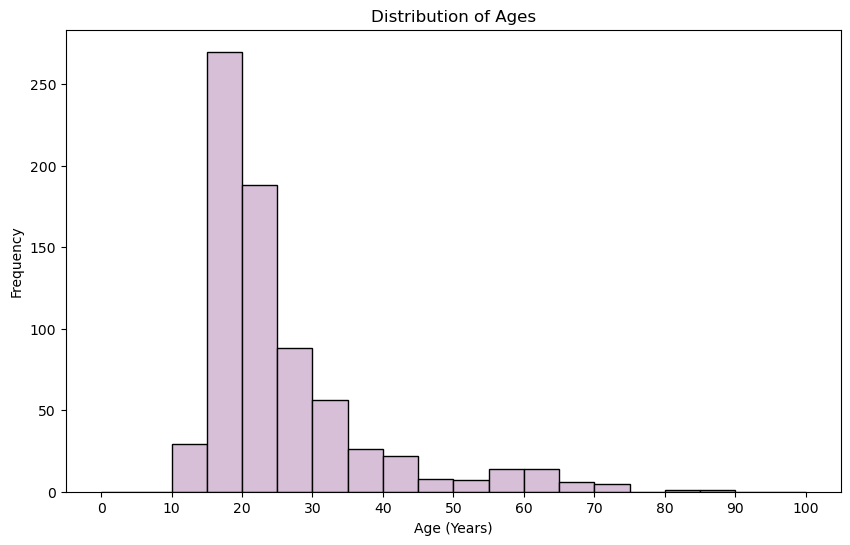

In [13]:
# Create histogram using age_data
plt.figure(figsize=(10,6))
plt.hist(age_data, bins=range(0, 101, 5),color='thistle',edgecolor='black')

# Add a title and labels, as well as the x-axis increment values
plt.title('Distribution of Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.xticks(range(0, 100 + 10, 10))

# Show the plot
plt.show()

It is clear that a large majority of participants were between the ages of 10 and 30. We can see this by inspecting the data.

In [16]:
print("Considering those who reported their age (all but one participant):")
younger_adults_percentage = round((len(age_data[np.logical_and(age_data >= 10, age_data <=30)]) / num_of_age_submissions) * 100,2)
print(str(younger_adults_percentage) + "% were aged between 10 and 30 (inclusive)")

Considering those who reported their age (all but one participant):
79.73% were aged between 10 and 30 (inclusive)


## Music Taste

We can now turn to explore the music tastes of the participants.

In [20]:
genre_counts = music_and_health_df['Fav genre'].value_counts(ascending = True)
print(genre_counts)
print(type(genre_counts))

Fav genre
Latin                 3
Gospel                6
Lofi                 10
Jazz                 20
Rap                  22
Country              25
K pop                26
Folk                 30
R&B                  35
Hip hop              35
EDM                  37
Video game music     44
Classical            53
Metal                88
Pop                 114
Rock                188
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


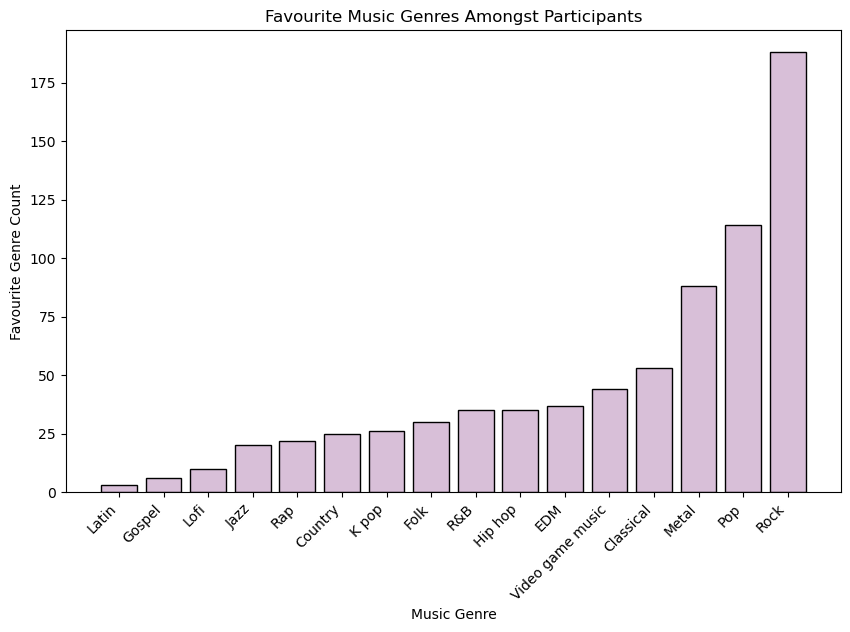

In [22]:
# We can represent this visually with a simple bar graph.
music_genres = genre_counts.index.to_numpy()
genre_counts = genre_counts.to_numpy()

plt.figure(figsize=(10,6))
plt.bar(music_genres, genre_counts, color='thistle', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Favourite Music Genres Amongst Participants')
plt.xlabel('Music Genre')
plt.ylabel('Favourite Genre Count')
plt.show()

So, it seems that Rock was the most commonly preferred genre of music amongst the participants. This is nice to see, but it would be nice to explore possible relationships between age of participants and music taste to see, for example, if there are any music genres that are more popular with respect to particular age groups. 

We could try to visualise both grouped bar charts and stacked bar charts to gain insight into the relationship between age and preferred music genre. Of course, most participants are between the age of 10-30, and so a deeper dive would require more data. <br> 

## Distribution of Preferred Music Tase Across Age Groups

As mentioned above, we can try and use a grouped bar chart to explore the most popular music genres amongst different age groups.

To quickly cover a grouped bar chart: this type of chart extends the normal bar chart, where we plotting numeric values for levels of multiple categorical variables instead of one. So, in our case, for each music genre we could show multiple bars that each represent a specific age rage. Enough talking, let's write some code!

# References

\[1] [The Importance of Demographic Data, Dr. Rashawn Ray](https://www.brookings.edu/wp-content/uploads/2020/01/1.15.20_Congressional-Testimony_Ray_Rashawn.pdf) <br>
\[2] 